# Data

In [1]:
from pycaret.datasets import get_data

data = get_data('telescope')

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [2]:
data

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# EDA

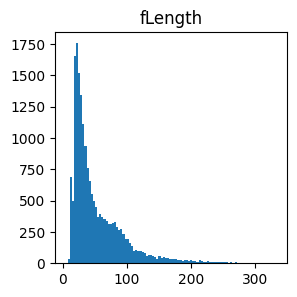

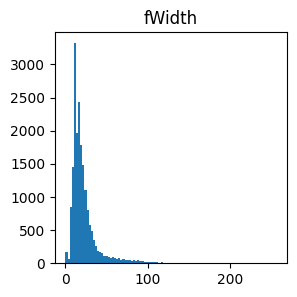

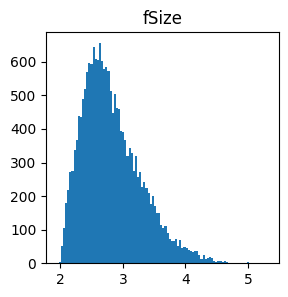

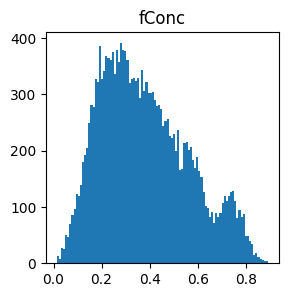

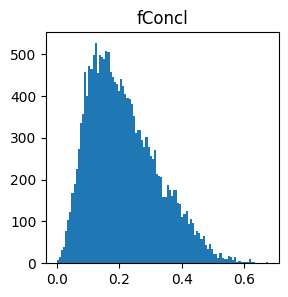

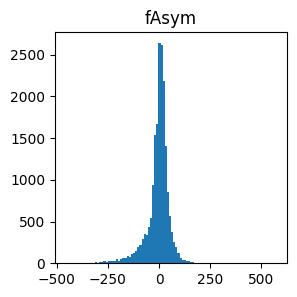

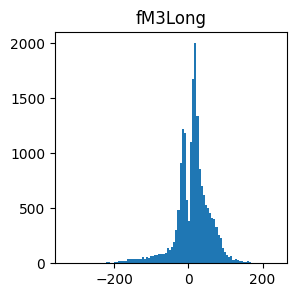

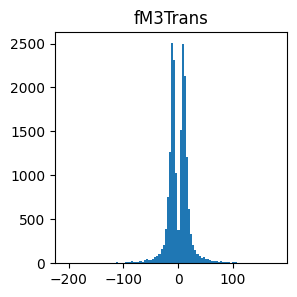

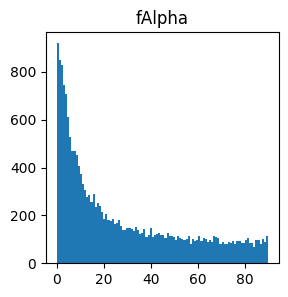

In [3]:
import matplotlib.pyplot as plt

for col in data.columns[:-2]:
    plt.figure(figsize=(3, 3))
    plt.hist(data[f"{col}"], bins=100);
    plt.title(f"{col}")

# Setup an ML Experiment

In [4]:
# Setup PyCaret Experiment

from pycaret.classification import *

experiment = setup(data, target='Class')

,Description,Value
0,session_id,3719
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"g: 0, h: 1"
4,Original Data,"(19020, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
# Model Selection
model = compare_models(n_select = 1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8857,0.9409,0.7731,0.8885,0.8267,0.7420,0.7461,4.7120
rf,Random Forest Classifier,0.8796,0.9348,0.7667,0.8767,0.8179,0.7286,0.7323,0.5180
xgboost,Extreme Gradient Boosting,0.8796,0.9343,0.7756,0.8695,0.8197,0.7297,0.7326,0.6570
lightgbm,Light Gradient Boosting Machine,0.8779,0.9364,0.7646,0.8738,0.8154,0.7247,0.7285,0.0530
et,Extra Trees Classifier,0.8746,0.9350,0.7418,0.8841,0.8066,0.7148,0.7210,0.1960
gbc,Gradient Boosting Classifier,0.8710,0.9253,0.7305,0.8840,0.7998,0.7060,0.7130,0.5280
ada,Ada Boost Classifier,0.8391,0.8969,0.7141,0.8079,0.7579,0.6382,0.6410,0.1640
dt,Decision Tree Classifier,0.8196,0.8021,0.7429,0.7454,0.7440,0.6047,0.6049,0.0300
knn,K Neighbors Classifier,0.8049,0.8425,0.5917,0.8035,0.6815,0.5455,0.5588,0.2900
lr,Logistic Regression,0.7907,0.8404,0.5949,0.7604,0.6673,0.5180,0.5265,0.8680


In [6]:
# Model Optimization

tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8791,0.9237,0.7553,0.8853,0.8152,0.7262,0.7312
1,0.8776,0.9310,0.7681,0.8699,0.8158,0.7247,0.7279
2,0.8784,0.9446,0.7511,0.8869,0.8134,0.7241,0.7296
3,0.8768,0.9318,0.7527,0.8803,0.8115,0.7208,0.7257
4,0.8775,0.9280,0.7463,0.8883,0.8111,0.7215,0.7275
5,0.8873,0.9359,0.7787,0.8883,0.8299,0.7462,0.7498
6,0.8738,0.9234,0.7426,0.8813,0.8060,0.7135,0.7192
7,0.8655,0.9226,0.7149,0.8819,0.7897,0.6924,0.7006
8,0.8768,0.9369,0.7362,0.8964,0.8084,0.7189,0.7265


# Finalize and Save Pipeline

In [8]:
# finalize the model
finalized_model = finalize_model(tuned_model)

# Setup an ML Experiment with Logging

In [9]:
# Setup PyCaret Experiment

from pycaret.classification import *

experiment = setup(
    data,
    target='Class',
    log_experiment=True,
    log_plots=True,
    experiment_name='telescope'  # Need this to make this appear in MLflow
)

,Description,Value
0,session_id,7701
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"g: 0, h: 1"
4,Original Data,"(19020, 11)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


2022/09/28 17:42:16 INFO mlflow.tracking.fluent: Experiment with name 'telescope' does not exist. Creating a new experiment.


In [10]:
# Model Selection
model = compare_models(n_select = 1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8864,0.9388,0.7699,0.8919,0.8261,0.7425,0.7472,4.7310
lightgbm,Light Gradient Boosting Machine,0.8803,0.9351,0.7639,0.8794,0.8173,0.7289,0.7332,0.0530
rf,Random Forest Classifier,0.8794,0.9348,0.7637,0.8774,0.8162,0.7272,0.7314,0.5170
xgboost,Extreme Gradient Boosting,0.8794,0.9318,0.7733,0.8688,0.8180,0.7283,0.7313,0.5870
et,Extra Trees Classifier,0.8766,0.9332,0.7371,0.8928,0.8072,0.7177,0.7251,0.2020
gbc,Gradient Boosting Classifier,0.8698,0.9230,0.7258,0.8827,0.7963,0.7020,0.7095,0.5270
ada,Ada Boost Classifier,0.8404,0.8926,0.7086,0.8129,0.7569,0.6389,0.6425,0.1300
dt,Decision Tree Classifier,0.8141,0.7972,0.7408,0.7325,0.7365,0.5929,0.5931,0.0310
knn,K Neighbors Classifier,0.8040,0.8340,0.5859,0.8026,0.6770,0.5412,0.5553,0.0340
lr,Logistic Regression,0.7871,0.8365,0.5823,0.7551,0.6573,0.5066,0.5158,0.0410


In [11]:
# Model Optimization

tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8814,0.9255,0.7537,0.8911,0.8167,0.7299,0.7355
1,0.8821,0.9364,0.7752,0.8744,0.8218,0.7342,0.7372
2,0.8829,0.9458,0.7966,0.8591,0.8267,0.7384,0.7396
3,0.8790,0.9287,0.7489,0.8880,0.8126,0.7242,0.7300
4,0.8813,0.9339,0.7554,0.8889,0.8167,0.7298,0.7351
5,0.8783,0.9370,0.7559,0.8803,0.8134,0.7238,0.7285
6,0.8775,0.9405,0.7645,0.8707,0.8141,0.7234,0.7268
7,0.8971,0.9422,0.7816,0.9125,0.8420,0.7663,0.7714
8,0.8881,0.9400,0.7859,0.8822,0.8313,0.7479,0.7507


In [12]:
# Finalize model
finalized_model = finalize_model(tuned_model)

# save model to disk
save_model(finalized_model, 'telescope-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Class')),
                 ('fix_perfect', Remove_100(target='Class')),
                 ('clean_names', Cl

# Deployment (Using MLflow)

In [13]:
# within notebook (notice ! sign infront)
#!mlflow ui

# on command line in the same folder (Use this!!!)
#mlflow ui

open your browser and type “http://127.0.0.1:5000”